In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
train = pd.read_csv(r'D:\churn prediction\data\train.csv')
test = pd.read_csv(r'D:\churn prediction\data\test.csv')

**Data overview**<br>
**Each row represents a customer's subscription period and their associated activities.**

In [3]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
train.shape

(2666, 20)

In [5]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


* Evening has lower rates than daytime, and nighttime rates are even lower than evening.

### Feature : churn 

In [6]:
no_of_customer_left = train[train['Churn'] == True].shape[0]
total_customers = train.shape[0]
churn_rate = no_of_customer_left / total_customers
print(f'the churn rate is :{round(churn_rate,3)}')

the churn rate is :0.146


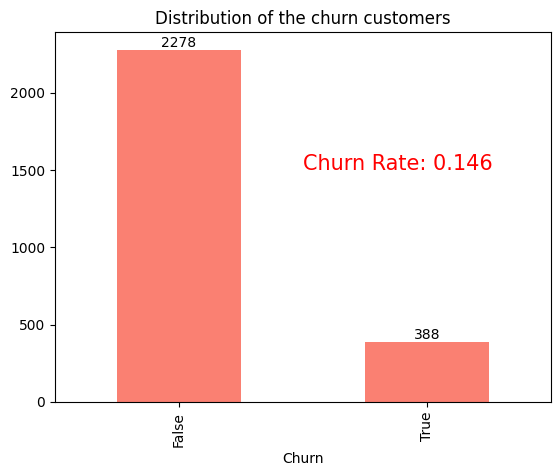

In [30]:
plt.title('Distribution of the churn customers')
ax = train['Churn'].value_counts().plot(kind='bar',color='salmon')
ax.bar_label(ax.containers[0])
plt.text(0.5,y=1500, s=f"Churn Rate: {round(churn_rate,3)} ", fontsize=15, color="red")
plt.show()

* The target feature is imbalance! so will need to handle it with care

### Feature : State

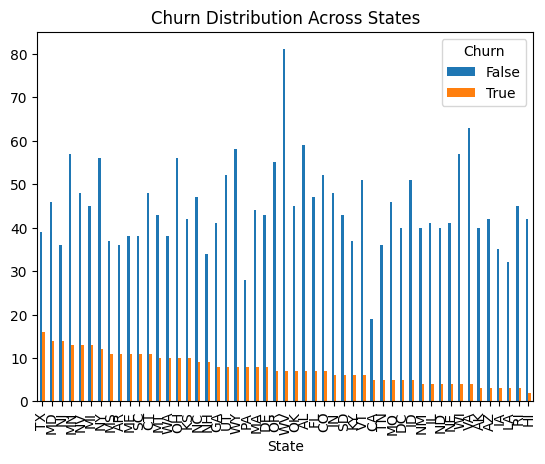

In [8]:
pd.crosstab(train['State'],train['Churn']).sort_values(by=[True],ascending=False).plot(kind='bar')
plt.title('Churn Distribution Across States')
plt.show()

### Feature : Account Length

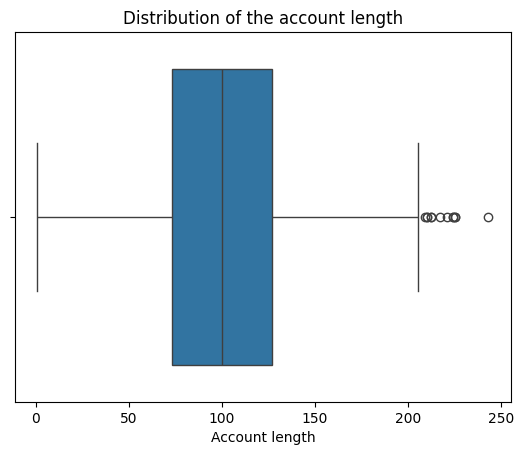

In [9]:
sns.boxplot(x=train['Account length'])
plt.title('Distribution of the account length')
plt.show()

* the IQR is bet 75- 125 (50%) of customer
* Outliers are present (exceeding 200 days)

##### does the account length have impact on the churn?

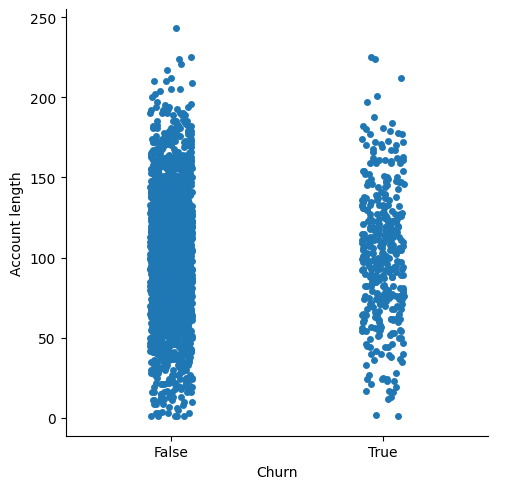

In [10]:
sns.catplot(data=train, x="Churn", y="Account length")

*   Account Length does not appear to have a significant impact on Churn.
##### Hypothesis testing do


### Area Code:Feature

Text(0.5, 1.0, 'distribution of area code in data')

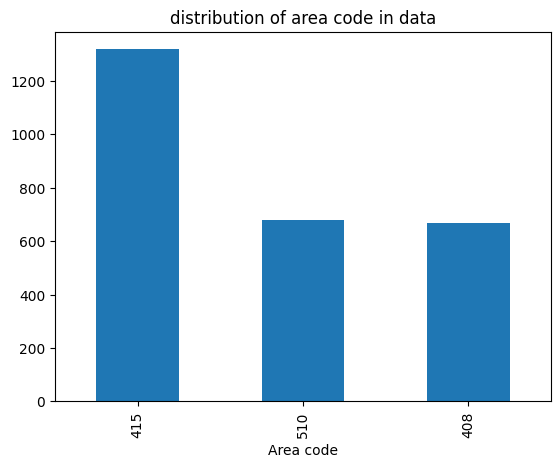

In [11]:
train['Area code'].value_counts().plot(kind='bar')
plt.title('distribution of area code in data')

In [12]:
#Churn rate across area code
churn_area_code = pd.crosstab(train['Area code'],train['Churn']).values[:,1] / pd.crosstab(train['Area code'],train['Churn']).values.sum(axis=1)
data_temp = {
    'area_code':[408,415,510],
    'churn_rate':churn_area_code,
}
pd.DataFrame(data_temp)

,area_code,churn_rate
0,408,0.140508
1,415,0.147951
2,510,0.145803


* Area 415 have the high customer volume with the stable churn rate,
* This may indicate stronger service quality, weaker competition, or a larger population in that region.However, further investigation would be needed to confirm these possibilities.
* Therefore, it would be strategic to invest more in customer retention and also targeted marketing efforts in the 415 area to increase the customer base


### International Plan: Nominal Categorical Feature

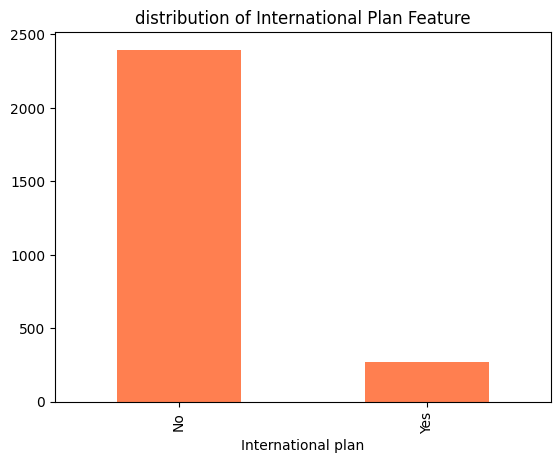

In [13]:
train['International plan'].value_counts().plot(kind='bar',color='coral')
plt.title('distribution of International Plan Feature')
plt.show()

* imbalanced distribution Many People Dont have international Plane !!!

In [14]:
churn_international_plan = pd.crosstab(train['International plan'],train['Churn']).values[:,1] / pd.crosstab(train['International plan'],train['Churn']).values.sum(axis=1)

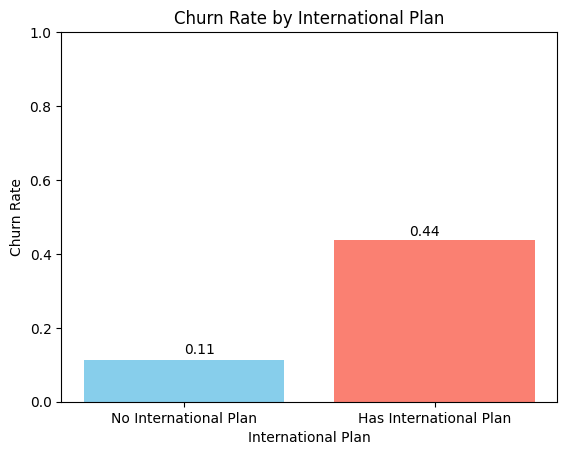

In [15]:
labels = ['No International Plan', 'Has International Plan']
plt.bar(labels, churn_international_plan, color=['skyblue', 'salmon'])
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.text(0.001,y=0.13,s = str(round(churn_international_plan[0],2)))
plt.text(0.9,y=0.45,s = str(round(churn_international_plan[1],2)))
plt.show()

* customer who have international plan **Churn rate is:0.44**
* customer who dont have international plan **Churn rate is:0.11**

##### customer who has international plan churned more? WHY?

In [16]:
pd.crosstab(train['International plan'],train['Churn'])

Churn,False,True
International plan,,
No,2126,270
Yes,152,118


In [17]:
intl_yes = train[train['International plan'] == 'Yes']
avg_intl_yes = intl_yes['Total intl charge'].sum() / intl_yes['Total intl minutes'].sum()
print(f'average intl charges for the international plan yes customer {np.round(avg_intl_yes,3)}')

average intl charges for the international plan yes customer 0.27


In [18]:
intl_no = train[train['International plan'] == 'No']
avg_intl_no = intl_no['Total intl charge'].sum() / intl_no['Total intl minutes'].sum()
print(f'average intl charges for the international plan yes customer {np.round(avg_intl_no,3)}')

average intl charges for the international plan yes customer 0.27


##### the average charges for the customer who have international plan and the customer's who dont have the interntaional plan are same!!


#### This are some data points in data for analysis


##### International Plan(yes) Data Points:


| **Total Intl Minutes** | **Total Intl Calls** | **Total Intl Charge** |
|------------------------|----------------------|-----------------------|
| 17.9                   | 3                    | 4.83                  |
| 17.6                   | 4                    | 4.75                  |


##### International Plan(No) Data Points:


| **Total Intl Minutes** | **Total Intl Calls** | **Total Intl Charge** |
|------------------------|----------------------|-----------------------|
| 17.6                   | 5                    | 4.75                  |
| 17.8                   | 4                    | 4.81                  |

* We can see that the total intl charges are quite similar for plan(Yes) and plan(No) for similar call records!!

##### observation:
1) The data shows that customers with and without the international plan have very similar international call charges, despite the assumption that purchasing the plan would offer better rates.
2) This lack of visible cost advantage may lead to customer dissatisfaction. If users don’t perceive added value from the international plan, they are more likely to churn, explaining the higher churn rate (44%) among plan holders.

### Voice mail plan : Feature

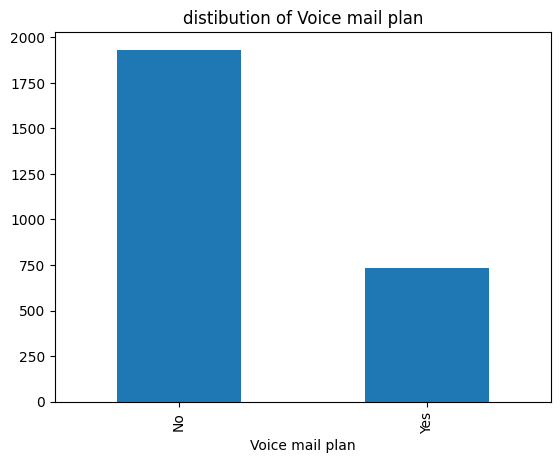

In [19]:
train['Voice mail plan'].value_counts().plot(kind='bar')
plt.title('distibution of Voice mail plan')
plt.show()

* majority of people dont have Voice mail plan

In [20]:
pd.crosstab(train['Voice mail plan'],train['Churn'])

Churn,False,True
Voice mail plan,,
No,1610,323
Yes,668,65


In [21]:
churn_voice_mail_plan = pd.crosstab(train['Voice mail plan'],train['Churn']).values[:,1] / pd.crosstab(train['Voice mail plan'],train['Churn']).values.sum(axis=1)
print(f'people who don\'t have voice mail plan CHURN_RATE:{churn_voice_mail_plan[0]}')
print(f'people who have voice mail plan CHURN_RATE:{churn_voice_mail_plan[1]}')

people who don't have voice mail plan CHURN_RATE:0.16709777547853077
people who have voice mail plan CHURN_RATE:0.08867667121418826


* the person who dont have voice mail plan will not recveive Number vmail messages that why all have 0 value
* customer who have purchased vmail plan have very low churn rate (0.088) !! i think the service of vmail plan is good!

### Customer service calls :Feature

In [22]:
pd.crosstab(train['Customer service calls'],train['Churn'])

Churn,False,True
Customer service calls,,
0,476,79
1,846,99
2,546,62
3,311,37
4,69,64
5,20,29
6,7,10
7,3,5
8,0,1


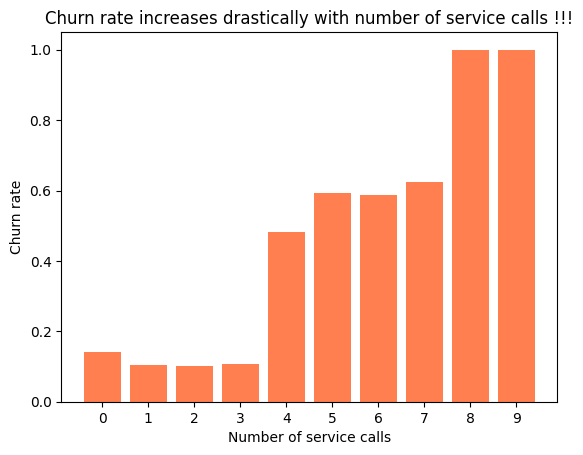

In [23]:
churn_service_calls = pd.crosstab(train['Customer service calls'],train['Churn']).values[:,1] / pd.crosstab(train['Customer service calls'],train['Churn']).values.sum(axis=1)
plt.bar(np.arange(0,10),churn_service_calls,color='coral')
plt.title('Churn rate increases drastically with number of service calls !!!')
plt.ylabel('Churn rate')
plt.xlabel('Number of service calls')
plt.xticks(np.arange(0,10))
plt.show()

* We can see that the churn rate increase with increase number of service calls!
* After 3 calls churn rate increase drastically
* Customers with more calls might be experiencing unresolved issues, possibly due to insufficient attention from the company.
* can significantly reduce churn if try to understand their problems and solve it

### numerical features distribution

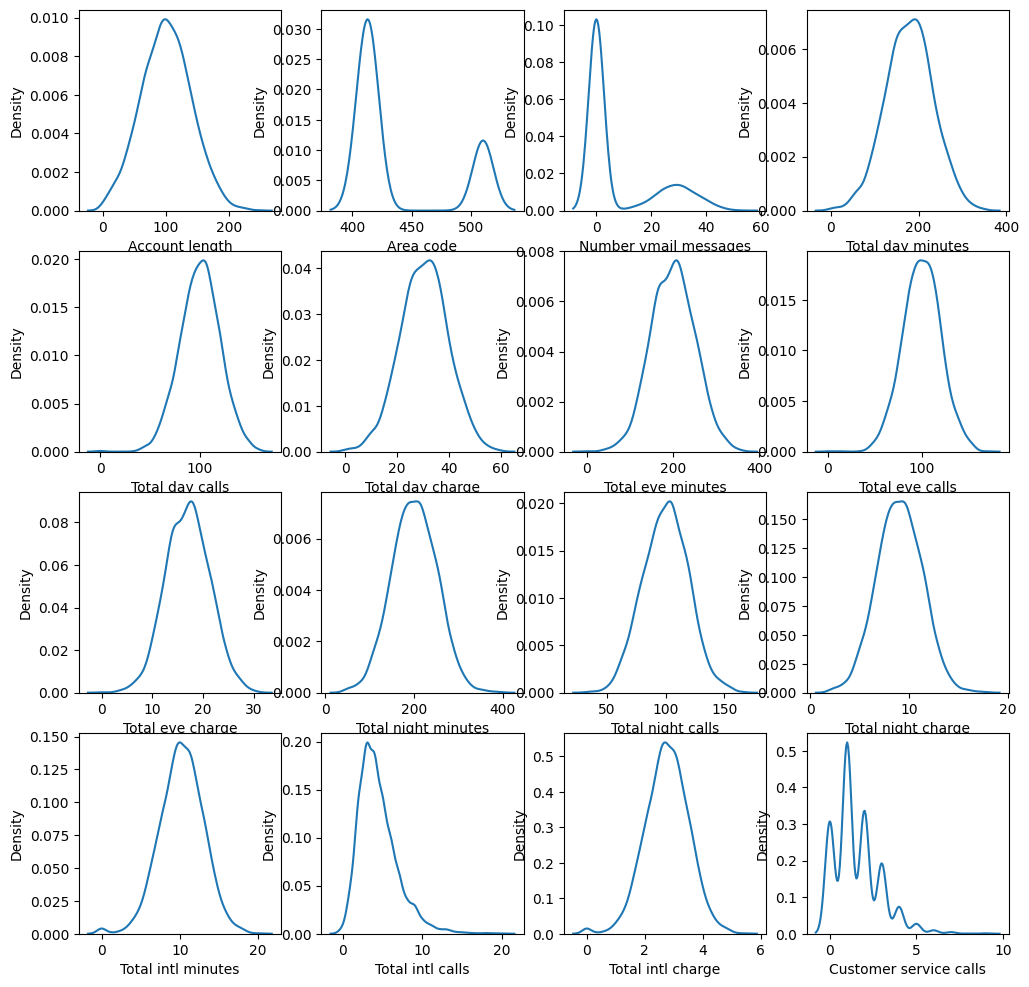

In [24]:
num_features=  train.select_dtypes(['int64','float64']).columns
plt.figure(figsize=(12,12))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.kdeplot(train[num_features[i-1]])

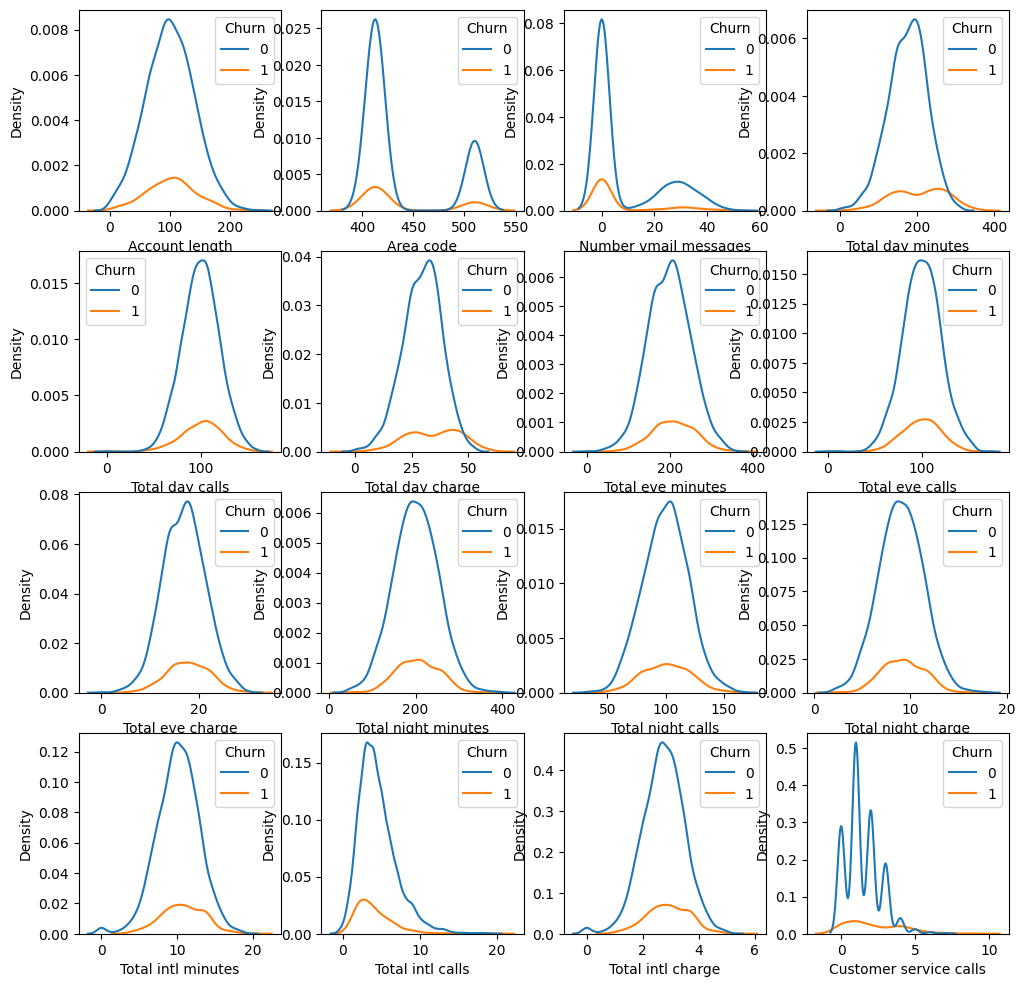

In [25]:
temp = train.copy()
temp['Churn'] = train['Churn'].map({False:0,True:1})

def dist_plot(feature_name):
    sns.kdeplot(data = temp , x= feature_name,hue='Churn')

num_features=  train.select_dtypes(['int64','float64']).columns


plt.figure(figsize=(12,12))
for i in range(1,17):
    plt.subplot(4,4,i)
    dist_plot(num_features[i-1])
plt.show()

<Axes: >

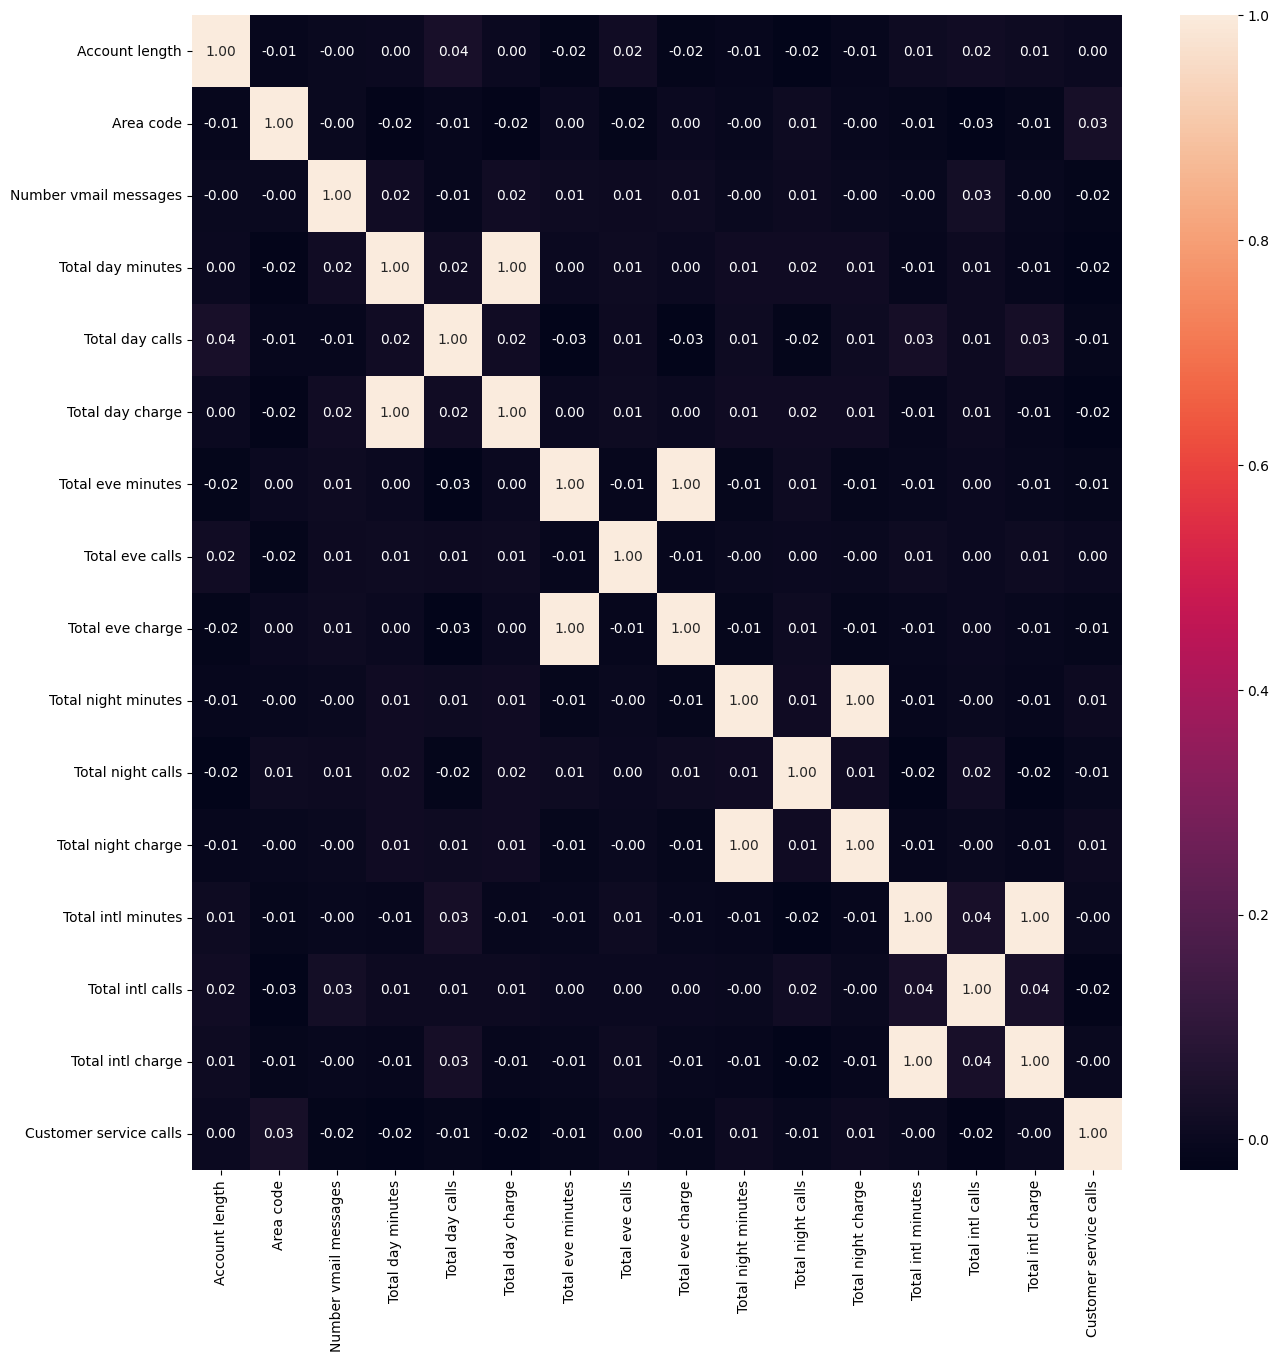

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(train.select_dtypes([int,float]).corr(),annot=True,fmt='0.2f')

* no multicollinearity present

# Insights

1) **Overall Churn Rate** is 0.146

2) **The 415 area code** has a significantly larger customer base compared to 408 and 510 and still has same the churn rate as them ?. This may indicate stronger service quality, weaker competition, or a larger population in that region. Therefore, it would be strategic to invest more in customer retention and also targeted marketing efforts in the 415 area to maximize growth.

3) **International Plan Pricing Issue:** There may be a data issue where customers who purchase the International Plan are being charged similarly to those without it, which could explain the higher churn rate. Customers may be dissatisfied if the plan does not offer the expected additional value, such as lower rates for international calls."
4) **Customers with Vmail Plan:** they have very low churn rate **(0.088)** !!This could indicate that the service is highly valued, suggesting that enhancing or promoting this service further might improve customer retention.
5) **Churn Increases After 3 Service Calls:** it increase drastically
Customers with more calls might be experiencing unresolved issues, possibly due to insufficient attention from the company.
can significantly reduce churn if try to understand their problems and solve!...